In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [5]:
titanic = sns.load_dataset('titanic')

df = titanic[['survived', 'fare']]

In [39]:
def make_predictions(df):
    X = df.drop(columns='survived')
    y = df.survived

    lr = LogisticRegression()
    lr.fit(X, y)

    df['p_survived'] = lr.predict_proba(X)[:, 1]

In [40]:
def roc_point(df, threshold):
    df['prediction'] = (df.p_survived > threshold).astype(int)

    survived = df[df.survived == 1]
    died = df[df.survived == 0]

    tpr = survived[survived.prediction == 1].shape[0] / survived.shape[0]
    fpr = died[died.prediction == 1].shape[0] / died.shape[0]

    return threshold, tpr, fpr

In [41]:
def plot_roc(df):
    points = pd.DataFrame([roc_point(df, t) for t in np.arange(0, 1.01, .01)])
    points.columns = ['threshold', 'tpr', 'fpr']
    points

    sns.relplot(data=points, x='fpr', y='tpr')

In [42]:
df1 = titanic[['survived', 'fare']]
df2 = titanic[['survived', 'fare', 'age']].dropna()

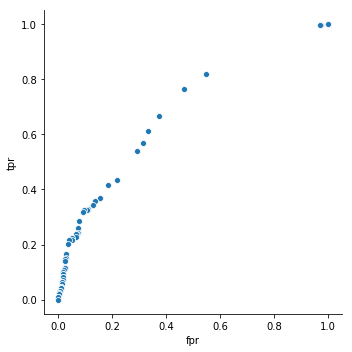

In [43]:
make_predictions(df1)
plot_roc(df1)

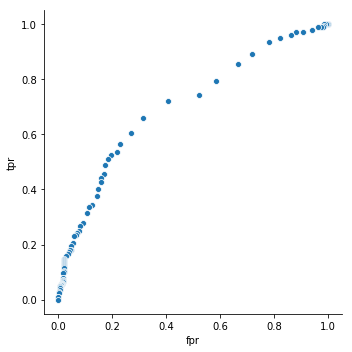

In [44]:
make_predictions(df2)
plot_roc(df2)